<a href="https://colab.research.google.com/github/dtermite/PythonColab/blob/main/Capitulo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Creando nombres

In [2]:
import pandas as pd

In [3]:
nombres_m = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?sexo=M&qtd=200')
nombres_f = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?sexo=F&qtd=200')

In [4]:
print("Cantidad de nombres: " + str(len(nombres_m)+len(nombres_f)))

Cantidad de nombres: 400


In [5]:
frames = [nombres_m, nombres_f]
frames

[          nome  regiao     freq  rank sexo
 0         JOSE       0  5732508     1    M
 1         JOAO       0  2971935     2    M
 2      ANTONIO       0  2567494     3    M
 3    FRANCISCO       0  1765197     4    M
 4       CARLOS       0  1483121     5    M
 ..         ...     ...      ...   ...  ...
 195     WALTER       0    67207   196    M
 196    ARLINDO       0    66669   197    M
 197    MICHAEL       0    65736   198    M
 198     ALVARO       0    65444   199    M
 199    GEOVANE       0    65435   200    M
 
 [200 rows x 5 columns],
           nome  regiao      freq  rank sexo
 0        MARIA       0  11694738     1    F
 1          ANA       0   3079729     2    F
 2    FRANCISCA       0    721637     3    F
 3      ANTONIA       0    588783     4    F
 4      ADRIANA       0    565621     5    F
 ..         ...     ...       ...   ...  ...
 195     ROSANE       0     82203   196    F
 196    IVONETE       0     81878   197    F
 197    LUCIANE       0     81230   198 

In [6]:
nombres = pd.concat(frames)['nome'].to_frame()
nombres.columns = ['nombre']
nombres.sample(5)

,nombre
58,ALESSANDRA
170,MARINALVA
157,JAIME
192,ZILDA
186,INES


#Incluyendo id de alumnos|

In [7]:
nombres.sample(5)

,nombre
30,ANDERSON
87,JONAS
1,JOAO
151,SEVERINA
48,RAQUEL


In [8]:
import numpy as np

In [9]:
#Creo numeros aleatorios con numpy para agregar el id a los registos del dataframe
np.random.seed(123)

In [10]:
total_alumnos = len(nombres)
total_alumnos

400

In [11]:
#creo los id y se los agrego al dataframe
nombres['id_alumno'] = np.random.permutation(total_alumnos) + 1
nombres.sample(5)

,nombre,id_alumno
188,VALDECIR,369
57,IGOR,303
3,ANTONIA,382
182,LIDIANE,33
30,ELIANE,111


In [12]:
#Creo una lista de dominios
dominios = ['@dominiodeemail.com', '@serviciodeemail.com']

In [13]:
#Agrego aleatoriemente dominios a los alumnos
nombres['dominio'] = np.random.choice(dominios, total_alumnos)
nombres.sample(5)

,nombre,id_alumno,dominio
84,FATIMA,78,@dominiodeemail.com
0,MARIA,331,@serviciodeemail.com
179,LILIANE,340,@dominiodeemail.com
10,LUIS,174,@dominiodeemail.com
171,VALDEMIR,45,@dominiodeemail.com


In [14]:
#Creo el campo email y armo al direccion de email con el nombre y dominio
nombres['email'] =nombres.nombre.str.cat(nombres.dominio).str.lower()
nombres.sample(5)

,nombre,id_alumno,dominio,email
114,ELZA,320,@dominiodeemail.com,elza@dominiodeemail.com
57,IGOR,303,@serviciodeemail.com,igor@serviciodeemail.com
85,FABRICIO,221,@dominiodeemail.com,fabricio@dominiodeemail.com
183,MARLON,8,@dominiodeemail.com,marlon@dominiodeemail.com
189,WESLEI,137,@dominiodeemail.com,weslei@dominiodeemail.com


#Creando Cursos

In [15]:
import html5lib

In [16]:
url = 'http://dsinformatica.dyndns.org/cursos/'

In [17]:
cursos =pd.read_html(url)
cursos

[                 Curso
 0  Introduccion a HTML
 1          Bootstrap 4
 2   JavaScript bÃ¡sico
 3        Java para web
 4          C# para Web
 5     Cursos de Python
 6         Curso de PHP
 7       Curso de React
 8     Curso de Node.JS]

In [18]:
#Al leer de una url lo levanta como una lista, para convertirlo en dataframe se invoca llamndo al primer elemento y se almacena en el mimso dataframe
cursos = cursos[0]
cursos

,Curso
0,Introduccion a HTML
1,Bootstrap 4
2,JavaScript bÃ¡sico
3,Java para web
4,C# para Web
5,Cursos de Python
6,Curso de PHP
7,Curso de React
8,Curso de Node.JS


In [19]:
cursos.head()

,Curso
0,Introduccion a HTML
1,Bootstrap 4
2,JavaScript bÃ¡sico
3,Java para web
4,C# para Web


#Adicionando Index

In [20]:
cursos.rename(columns={'Curso' : 'nombre_curso'})

,nombre_curso
0,Introduccion a HTML
1,Bootstrap 4
2,JavaScript bÃ¡sico
3,Java para web
4,C# para Web
5,Cursos de Python
6,Curso de PHP
7,Curso de React
8,Curso de Node.JS


In [21]:
#renombro columna y la aplico al dataframe
cursos = cursos.rename(columns={'Curso' : 'nombre_curso'})

In [22]:
cursos

,nombre_curso
0,Introduccion a HTML
1,Bootstrap 4
2,JavaScript bÃ¡sico
3,Java para web
4,C# para Web
5,Cursos de Python
6,Curso de PHP
7,Curso de React
8,Curso de Node.JS


In [23]:
#Agregando un indice a dataframe
cursos['id']= cursos.index + 1
cursos

,nombre_curso,id
0,Introduccion a HTML,1
1,Bootstrap 4,2
2,JavaScript bÃ¡sico,3
3,Java para web,4
4,C# para Web,5
5,Cursos de Python,6
6,Curso de PHP,7
7,Curso de React,8
8,Curso de Node.JS,9


In [24]:
#reemplazo el index con mi columna id
cursos = cursos.set_index('id')
cursos

,nombre_curso
id,
1,Introduccion a HTML
2,Bootstrap 4
3,JavaScript bÃ¡sico
4,Java para web
5,C# para Web
6,Cursos de Python
7,Curso de PHP
8,Curso de React
9,Curso de Node.JS


In [25]:
cursos.shape

(9, 1)

#Matriculando alumnos

In [26]:
nombres['matriculas'] = np.ceil(np.random.exponential(size=total_alumnos)*1.5).astype(int)
nombres.head()

,nombre,id_alumno,dominio,email,matriculas
0,JOSE,235,@dominiodeemail.com,jose@dominiodeemail.com,1
1,JOAO,43,@serviciodeemail.com,joao@serviciodeemail.com,1
2,ANTONIO,304,@serviciodeemail.com,antonio@serviciodeemail.com,5
3,FRANCISCO,156,@dominiodeemail.com,francisco@dominiodeemail.com,5
4,CARLOS,343,@serviciodeemail.com,carlos@serviciodeemail.com,1


In [27]:
nombres.matriculas.describe()

count    400.000000
mean       2.135000
std        1.515757
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       12.000000
Name: matriculas, dtype: float64

In [28]:
import seaborn as sns

<ipython-input-29-68059771b3aa>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(nombres.matriculas)


<Axes: xlabel='matriculas', ylabel='Density'>

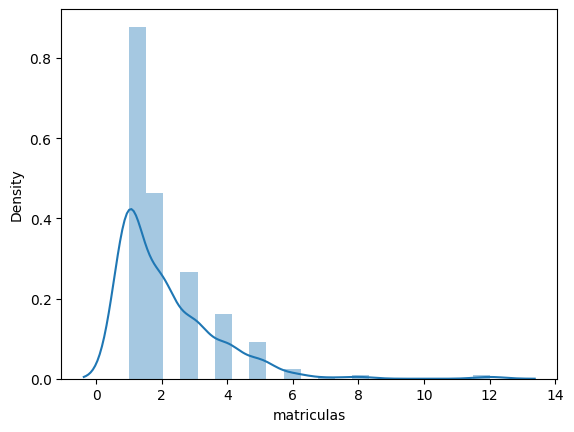

In [29]:
sns.distplot(nombres.matriculas)

In [30]:
nombres.matriculas.value_counts()

1     184
2      97
3      56
4      34
5      19
6       5
12      2
8       2
7       1
Name: matriculas, dtype: int64

#Seleccionando Alumnos

In [31]:
nombres.head()

,nombre,id_alumno,dominio,email,matriculas
0,JOSE,235,@dominiodeemail.com,jose@dominiodeemail.com,1
1,JOAO,43,@serviciodeemail.com,joao@serviciodeemail.com,1
2,ANTONIO,304,@serviciodeemail.com,antonio@serviciodeemail.com,5
3,FRANCISCO,156,@dominiodeemail.com,francisco@dominiodeemail.com,5
4,CARLOS,343,@serviciodeemail.com,carlos@serviciodeemail.com,1


In [32]:
cursos

,nombre_curso
id,
1,Introduccion a HTML
2,Bootstrap 4
3,JavaScript bÃ¡sico
4,Java para web
5,C# para Web
6,Cursos de Python
7,Curso de PHP
8,Curso de React
9,Curso de Node.JS


In [33]:
todas_matriculas = []
x = np.random.rand(len(cursos))
prob = x / sum(x)
prob

array([2.57370998e-01, 3.90402384e-02, 1.30203045e-01, 6.49005977e-02,
       2.34540225e-01, 1.27522899e-01, 4.27078183e-05, 8.25094425e-02,
       6.38698466e-02])

In [34]:
#Elejir aleatoreamente los cursos y asignarselo a los alumnos
for index, row in nombres.iterrows():
  id = row.id_alumno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)

matriculas=pd.DataFrame(todas_matriculas, columns=['id_alumno', 'id_curso'])
matriculas.head()

,id_alumno,id_curso
0,235,1
1,43,5
2,304,3
3,304,1
4,304,9


In [35]:
matriculas_por_curso =matriculas.groupby('id_curso').count().join(cursos['nombre_curso'])[['nombre_curso', 'id_alumno']].rename(columns={'id_alumno':'Total'}).sort_values('Total', ascending = False)
matriculas_por_curso

,nombre_curso,Total
id_curso,,
1,Introduccion a HTML,240
5,C# para Web,203
6,Cursos de Python,109
3,JavaScript bÃ¡sico,100
8,Curso de React,68
4,Java para web,49
9,Curso de Node.JS,46
2,Bootstrap 4,38
7,Curso de PHP,1


In [36]:
prob

array([2.57370998e-01, 3.90402384e-02, 1.30203045e-01, 6.49005977e-02,
       2.34540225e-01, 1.27522899e-01, 4.27078183e-05, 8.25094425e-02,
       6.38698466e-02])

#Salida en diferentes formatos

In [37]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index = False)

In [38]:
matriculas_por_curso.to_json('matriculas_por_curso.json')

In [39]:
matriculas_por_curso.to_html('matriculas_por_curso.html', index = False)

#Creando Banco SQL

In [47]:
#Importo las librerias para trabajar con base de datos
from sqlalchemy import create_engine, MetaData, Table, inspect, text

In [48]:
matriculas_por_curso.head(5)

,nombre_curso,Total
id_curso,,
1,Introduccion a HTML,240
5,C# para Web,203
6,Cursos de Python,109
3,JavaScript bÃ¡sico,100
8,Curso de React,68


In [42]:
#Creo el motor de busqueda. Python trabaja con cualquier base de datos, colob tiene su propia en el nube que va a estar activa en memoria, muentra este en uso
engine = create_engine('sqlite:///: memory:')
engine

Engine(sqlite:///: memory:)

In [45]:
#Exportar el Dataframe a SQL, se graba en una base con nombre "matriculas"
matriculas_por_curso.to_sql('matriculas', engine)

9

In [49]:
insp = inspect(engine)
print(insp.get_table_names())

['matriculas']
